In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Importing the dataset
df= pd.read_csv("df_county.csv")
df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2000,257,111,96,39,10,1,0,205,129,54,0,0,215,42,0
1,Alabama,Clay,2000,271,155,101,14,1,0,0,177,90,46,0,0,188,83,0
2,Alabama,Colbert,2000,106,38,66,2,0,0,0,124,80,58,0,0,0,106,0
3,Alabama,DeKalb,2000,354,169,123,58,4,0,0,159,115,51,0,0,297,56,1
4,Alabama,Elmore,2000,242,125,78,37,2,0,0,166,112,50,0,0,242,0,0


In [6]:
df.shape

(24442, 18)

The dataset has 24442 rows and 18 columns

In [7]:
df.dtypes

State                                  object
County                                 object
Year                                    int64
Days with AQI                           int64
Good Days                               int64
Moderate Days                           int64
Unhealthy for Sensitive Groups Days     int64
Unhealthy Days                          int64
Very Unhealthy Days                     int64
Hazardous Days                          int64
Max AQI                                 int64
90th Percentile AQI                     int64
Median AQI                              int64
Days CO                                 int64
Days NO2                                int64
Days Ozone                              int64
Days PM2.5                              int64
Days PM10                               int64
dtype: object

Our target variable is number of days PM2.5. We can see that it is a continuos variable

In [8]:
df.isnull().sum()

State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64

We can see that there is no null values

In [9]:
df.nunique()

State                                   55
County                                 990
Year                                    23
Days with AQI                          364
Good Days                              366
Moderate Days                          282
Unhealthy for Sensitive Groups Days    118
Unhealthy Days                          83
Very Unhealthy Days                     36
Hazardous Days                          23
Max AQI                                502
90th Percentile AQI                    185
Median AQI                             119
Days CO                                215
Days NO2                               285
Days Ozone                             363
Days PM2.5                             367
Days PM10                              352
dtype: int64

In [10]:
df['Days PM2.5'].max()

366

In [11]:
df['Days PM10'].max()

366

In [12]:
# Define the bin edges and labels for categorization
bin_edges = [0, 50, 100, 150, 200, float('inf')]
bin_labels = ['Less than 50', '50 - 100', '100 - 150', '150 - 200', 'More than 200']

# Convert 'Days PM2.5' column to categorical and impute NaN with "None"
df['Days PM2.5 Category'] = pd.cut(df['Days PM2.5'], bins=bin_edges, labels=bin_labels)
df['Days PM2.5 Category'] = df['Days PM2.5 Category'].cat.add_categories('None').fillna('None')

# Convert 'Days PM10' column to categorical and impute NaN with "None"
df['Days PM10 Category'] = pd.cut(df['Days PM10'], bins=bin_edges, labels=bin_labels)
df['Days PM10 Category'] = df['Days PM10 Category'].cat.add_categories('None').fillna('None')


In [13]:
df.dtypes

State                                    object
County                                   object
Year                                      int64
Days with AQI                             int64
Good Days                                 int64
Moderate Days                             int64
Unhealthy for Sensitive Groups Days       int64
Unhealthy Days                            int64
Very Unhealthy Days                       int64
Hazardous Days                            int64
Max AQI                                   int64
90th Percentile AQI                       int64
Median AQI                                int64
Days CO                                   int64
Days NO2                                  int64
Days Ozone                                int64
Days PM2.5                                int64
Days PM10                                 int64
Days PM2.5 Category                    category
Days PM10 Category                     category
dtype: object

In [14]:
df.nunique()

State                                   55
County                                 990
Year                                    23
Days with AQI                          364
Good Days                              366
Moderate Days                          282
Unhealthy for Sensitive Groups Days    118
Unhealthy Days                          83
Very Unhealthy Days                     36
Hazardous Days                          23
Max AQI                                502
90th Percentile AQI                    185
Median AQI                             119
Days CO                                215
Days NO2                               285
Days Ozone                             363
Days PM2.5                             367
Days PM10                              352
Days PM2.5 Category                      6
Days PM10 Category                       6
dtype: int64

In [15]:
df.head(10)

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Days PM2.5 Category,Days PM10 Category
0,Alabama,Baldwin,2000,257,111,96,39,10,1,0,205,129,54,0,0,215,42,0,Less than 50,None
1,Alabama,Clay,2000,271,155,101,14,1,0,0,177,90,46,0,0,188,83,0,50 - 100,None
2,Alabama,Colbert,2000,106,38,66,2,0,0,0,124,80,58,0,0,0,106,0,100 - 150,None
3,Alabama,DeKalb,2000,354,169,123,58,4,0,0,159,115,51,0,0,297,56,1,50 - 100,Less than 50
4,Alabama,Elmore,2000,242,125,78,37,2,0,0,166,112,50,0,0,242,0,0,None,None
5,Alabama,Escambia,2000,119,36,80,3,0,0,0,123,83,57,0,0,0,114,5,100 - 150,Less than 50
6,Alabama,Etowah,2000,101,34,60,7,0,0,0,141,87,59,0,0,0,83,18,50 - 100,Less than 50
7,Alabama,Houston,2000,102,45,56,1,0,0,0,120,79,54,0,0,0,94,8,50 - 100,Less than 50
8,Alabama,Jefferson,2000,366,25,239,73,25,4,0,208,140,79,35,0,83,233,15,More than 200,Less than 50
9,Alabama,Lawrence,2000,272,136,106,29,1,0,0,172,101,51,0,0,209,63,0,50 - 100,None


In [16]:
df.isnull().sum()

State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
Days PM2.5 Category                    0
Days PM10 Category                     0
dtype: int64

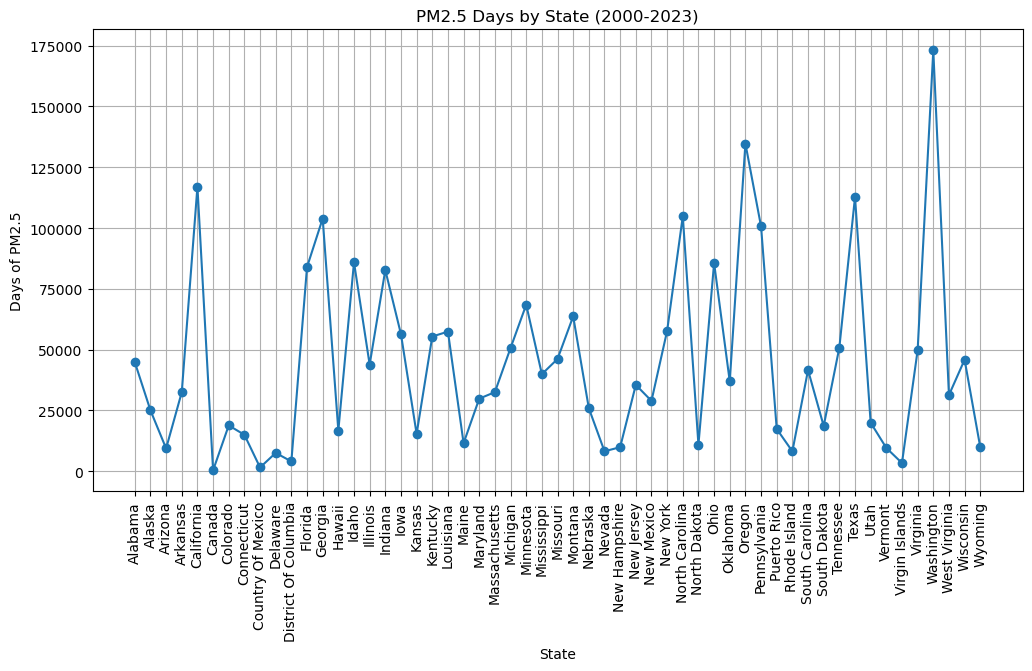

In [17]:


# Filter the DataFrame for the years 2000 to 2023
filtered_df = df[(df['Year'] >= 2000) & (df['Year'] <= 2023)]

# Group the data by State and sum the Days PM2.5
state_pm2_5_data = filtered_df.groupby('State')['Days PM2.5'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(state_pm2_5_data['State'], state_pm2_5_data['Days PM2.5'], marker='o', linestyle='-')
plt.title('PM2.5 Days by State (2000-2023)')
plt.xlabel('State')
plt.ylabel('Days of PM2.5')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()


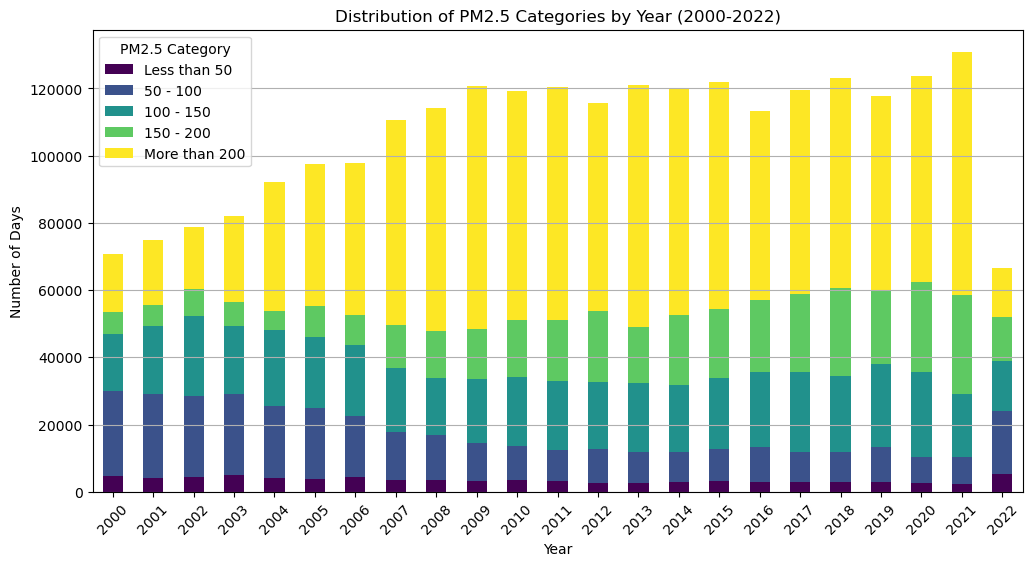

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the years 2000 to 2022
filtered_df = df[(df['Year'] >= 2000) & (df['Year'] <= 2022)]

# Define the bin edges and labels for categorization
bin_edges = [0, 50, 100, 150, 200, float('inf')]
bin_labels = ['Less than 50', '50 - 100', '100 - 150', '150 - 200', 'More than 200']

# Convert 'Days PM2.5' to categorical
filtered_df['PM2.5 Category'] = pd.cut(filtered_df['Days PM2.5'], bins=bin_edges, labels=bin_labels)

# Pivot the data to create a stacked bar chart
pivot_df = filtered_df.pivot_table(index='Year', columns='PM2.5 Category', values='Days PM2.5', aggfunc='sum', fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Distribution of PM2.5 Categories by Year (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()


In [19]:
# Deleting 2022 as it is not completely documented
df = df[df['Year'] != 2022]

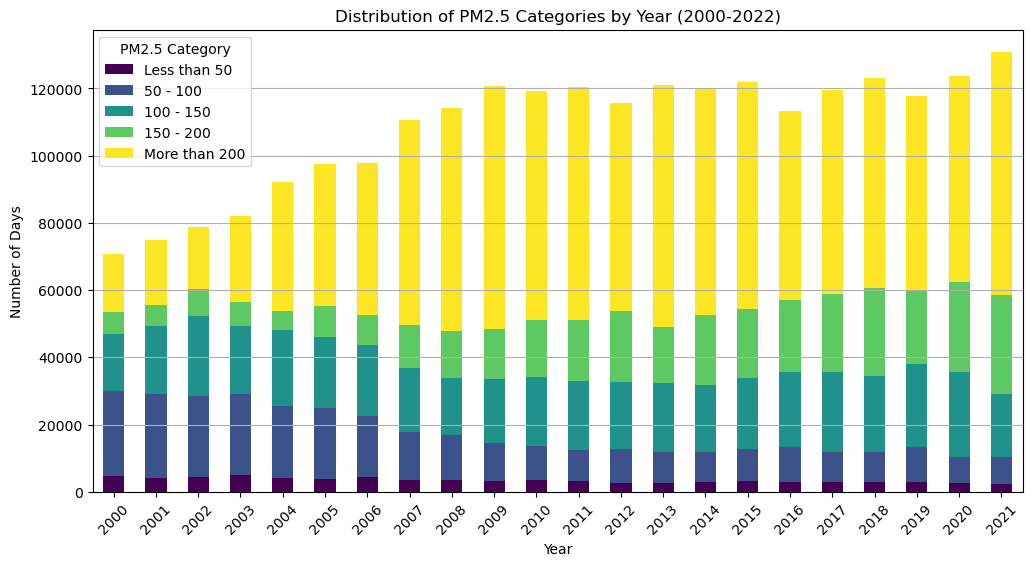

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for the years 2000 to 2022
filtered_df = df[(df['Year'] >= 2000) & (df['Year'] <= 2022)]

# Define the bin edges and labels for categorization
bin_edges = [0, 50, 100, 150, 200, float('inf')]
bin_labels = ['Less than 50', '50 - 100', '100 - 150', '150 - 200', 'More than 200']

# Convert 'Days PM2.5' to categorical
filtered_df['PM2.5 Category'] = pd.cut(filtered_df['Days PM2.5'], bins=bin_edges, labels=bin_labels)

# Pivot the data to create a stacked bar chart
pivot_df = filtered_df.pivot_table(index='Year', columns='PM2.5 Category', values='Days PM2.5', aggfunc='sum', fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Distribution of PM2.5 Categories by Year (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.grid(axis='y')
plt.xticks(rotation=45)

plt.show()


In [30]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'State', 'Year', and 'Days PM2.5' columns

# Group the data by 'State' and 'Year', and calculate the average
df['Average Days PM2.5'] = df.groupby(['State', 'Year'])['Days PM2.5'].transform('mean')


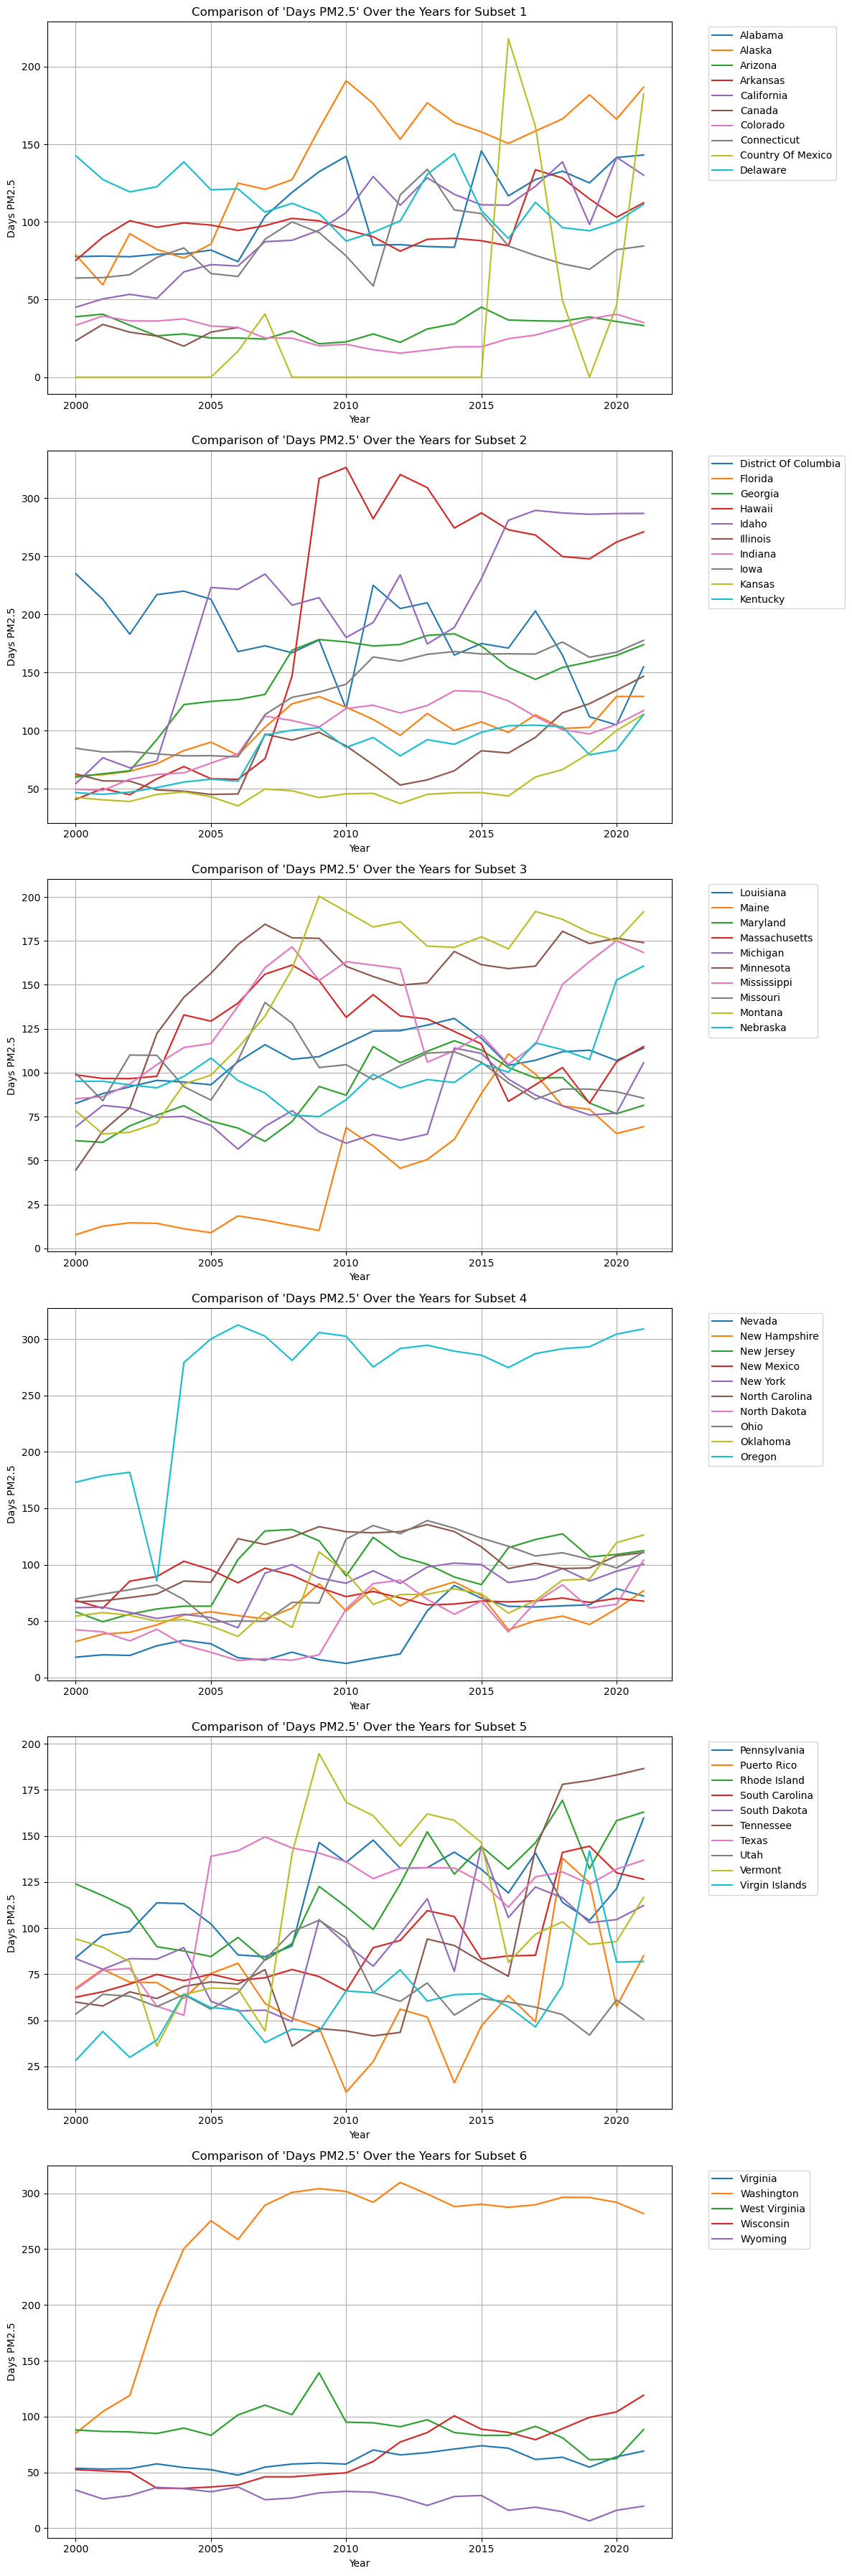

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get a list of unique counties from the DataFrame
states_to_compare = df['State'].unique()

# Define the number of states to display in each graph
states_per_graph = 10

# Calculate the number of graphs needed
num_graphs = (len(states_to_compare) + states_per_graph - 1) // states_per_graph

# Filter the DataFrame for the selected years
start_year = 2000
end_year = 2022
filtered_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

# Create multiple subplots, each showing 10 states
fig, axes = plt.subplots(num_graphs, 1, figsize=(12, 6 * num_graphs))

for i in range(num_graphs):
    start_idx = i * states_per_graph
    end_idx = (i + 1) * states_per_graph
    states_subset = states_to_compare[start_idx:end_idx]

    ax = axes[i]
    ax.set_title(f"Comparison of 'Days PM2.5' Over the Years for Subset {i + 1}")
    
    # Iterate through the selected states and plot a line for each
    for state in states_subset:
        state_data = filtered_df[filtered_df['State'] == state]
        sns.lineplot(data=state_data, x='Year', y='Average Days PM2.5', label=state, ax=ax)

    ax.set_xlabel('Year')
    ax.set_ylabel('Days PM2.5')
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the legend position

plt.tight_layout()
plt.show()


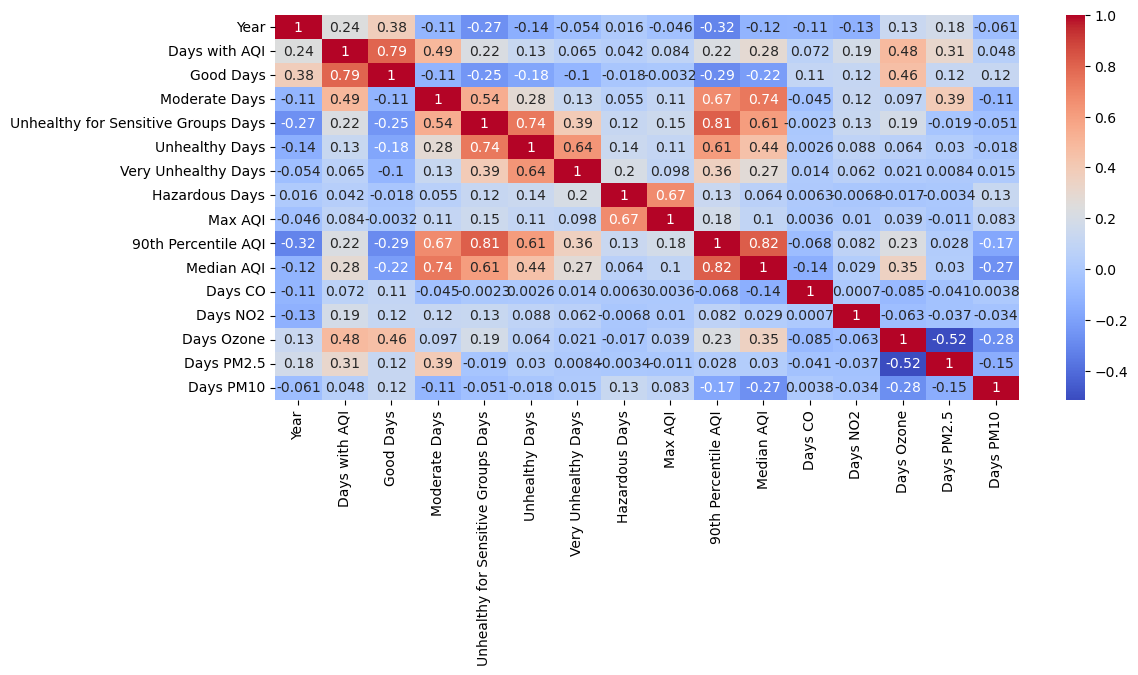

In [27]:
cor=df.corr()
plt.figure(figsize=(12,5))
sn.heatmap(df.corr(),annot=True, cmap ='coolwarm')
plt.show()




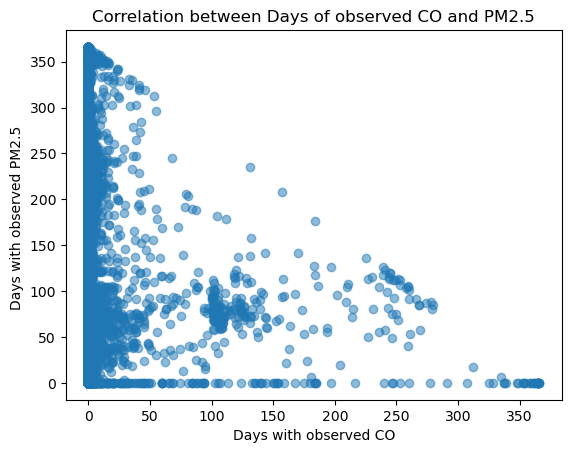

In [28]:

# Correlation Analysis
plt.scatter(df['Days CO'], df['Days PM2.5'], alpha=0.5)
plt.xlabel('Days with observed CO')
plt.ylabel('Days with observed PM2.5 ')
plt.title('Correlation between Days of observed CO and PM2.5')
plt.show()


Time series line plot: Show how the number of days with high PM2.5 and PM10 levels has changed over the years, with years on the x-axis and the number of days on the y-axis.

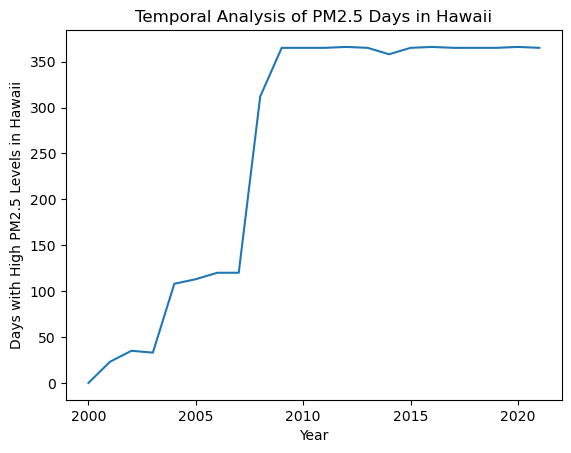

In [29]:
# Assuming you have a DataFrame named 'df' with columns 'Year', 'State', and 'Days PM2.5'
# Filter the DataFrame to include only data for the state of Hawaii
hawaii_df = df[df['County'] == 'Hawaii']

# Plot the data for Hawaii
plt.plot(hawaii_df['Year'], hawaii_df['Days PM2.5'])
plt.xlabel('Year')
plt.ylabel('Days with High PM2.5 Levels in Hawaii')
plt.title('Temporal Analysis of PM2.5 Days in Hawaii')
plt.show()


In [34]:
import pandas as pd
# Load data for each state
oregon_df = pd.read_csv('Oregon_temp.csv')
california_df = pd.read_csv('California_temp.csv')
washington_df = pd.read_csv('Washington_temp.csv')
texas_df = pd.read_csv('Texas_temp.csv')

# Add a 'State' column to each DataFrame
oregon_df['State'] = 'Oregon'
california_df['State'] = 'California'
washington_df['State'] = 'Washington'
texas_df['State'] = 'Texas'

# Concatenate the DataFrames
temperature_df = pd.concat([oregon_df, california_df, washington_df, texas_df], ignore_index=True)


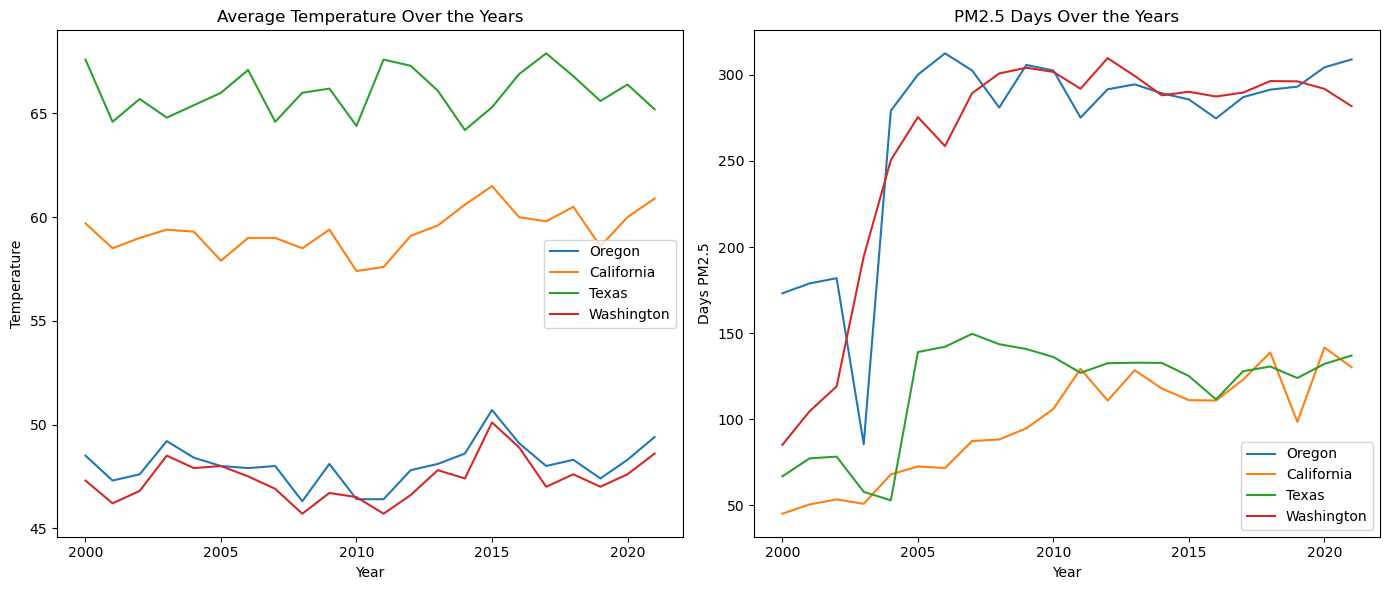

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have DataFrames 'temperature_df' and 'pm25_days_df' for temperature and PM2.5 days
# These DataFrames should have a common 'Year' column and 'State' column

# Filter the DataFrames to include only the common states
common_states = ['Oregon', 'California', 'Texas', 'Washington']
temperature_df_common = temperature_df[temperature_df['State'].isin(common_states)]
pm25_days_df_common = df[df['State'].isin(common_states)]

# Create a figure with two subplots (one for temperature and one for PM2.5 days)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the temperature data in the left subplot
for state in common_states:
    state_data = temperature_df_common[temperature_df_common['State'] == state]
    axes[0].plot(state_data['Year'], state_data['Temp'], label=state)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Temperature Over the Years')

# Plot the PM2.5 days data in the right subplot
for state in common_states:
    state_data = pm25_days_df_common[pm25_days_df_common['State'] == state]
    axes[1].plot(state_data['Year'], state_data['Average Days PM2.5'], label=state)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Days PM2.5')
axes[1].set_title('PM2.5 Days Over the Years')

# Add legends to each subplot
axes[0].legend()
axes[1].legend()

# Display the subplots
plt.tight_layout()  # Ensures that the plots don't overlap
plt.show()


In [39]:
#Importing the dataset
df_monitor= pd.read_csv("df_monitor.csv")
df_monitor.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.075,0.062,0.035,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-01-27
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.067,0.055,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-01-27
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.067,0.055,0.029,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-01-27
3,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.067,0.055,0.028,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2022-01-27
4,1,3,10,68101,1,30.497478,-87.880258,NAD83,Sample Flow Rate- CV,24 HOUR,...,0.400,0.200,0.100,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2020-05-21


In [41]:
df_monitor.shape

(1915530, 55)

In [42]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
from folium.plugins import HeatMap


In [ ]:
m = folium.Map(location=[30.497478, -87.880258], zoom_start=10)
